In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [25]:
#from sklearn.datasets import load_boston

In [26]:
df=pd.read_csv('HousingData.csv')

In [27]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()


In [28]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [29]:
df.shape

(506, 14)

In [30]:
#adding colums
#df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO' ]

In [31]:
df['Price']=df['CRIM']

In [32]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.00632
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.02731
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.02729
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.03237
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2,0.06905


In [33]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4,0.06263
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0.04527
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0.06076
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0.10959
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9,0.04741


In [34]:
df.nunique()

,0
CRIM,484
ZN,26
INDUS,76
CHAS,2
NOX,81
RM,446
AGE,348
DIS,412
RAD,9
TAX,66


In [35]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [36]:
df.isnull().sum()


,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [37]:
df.dropna(inplace=True)

In [38]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
500,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [39]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Price
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645,3.690136
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979,9.202423
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000,0.006320
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000,0.081955
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000,0.268880
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000,3.435973
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,88.976200


In [40]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Price
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230,1.000000
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822,-0.188075
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829,0.391552
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701,-0.051970
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054,0.416160
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951,-0.227170
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470,0.341311
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547,-0.365052
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638,0.608667
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864,0.560841


ypes of Correlation
Positive Correlation: As one variable increases, the other variable also increases.
Negative Correlation: As one variable increases, the other variable decreases.
No Correlation: No discernible pattern or relationship between the variables.
Measuring Correlation
The most common way to measure correlation is through the Pearson correlation coefficient (denoted as
𝑟
r), which quantifies the linear relationship between two continuous variables. The value of
𝑟
r ranges from -1 to 1:

1 indicates a perfect positive linear relationship.
-1 indicates a perfect negative linear relationship.
0 indicates no linear relationship.


<Axes: >

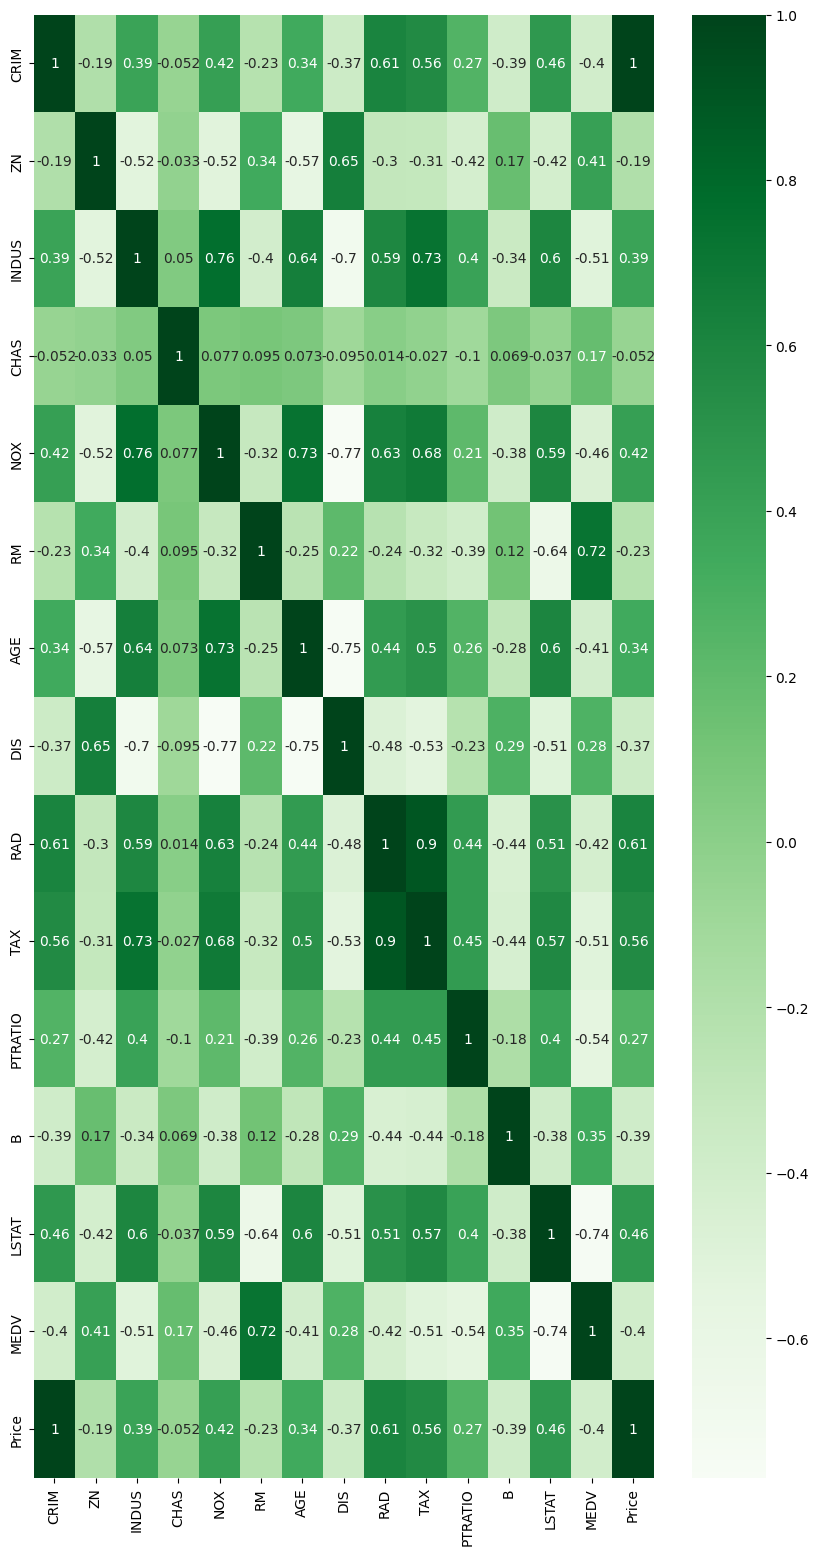

In [41]:
plt.figure(figsize=(10,19))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

In [42]:
sns.pairplot(df,size=5)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Axes: >

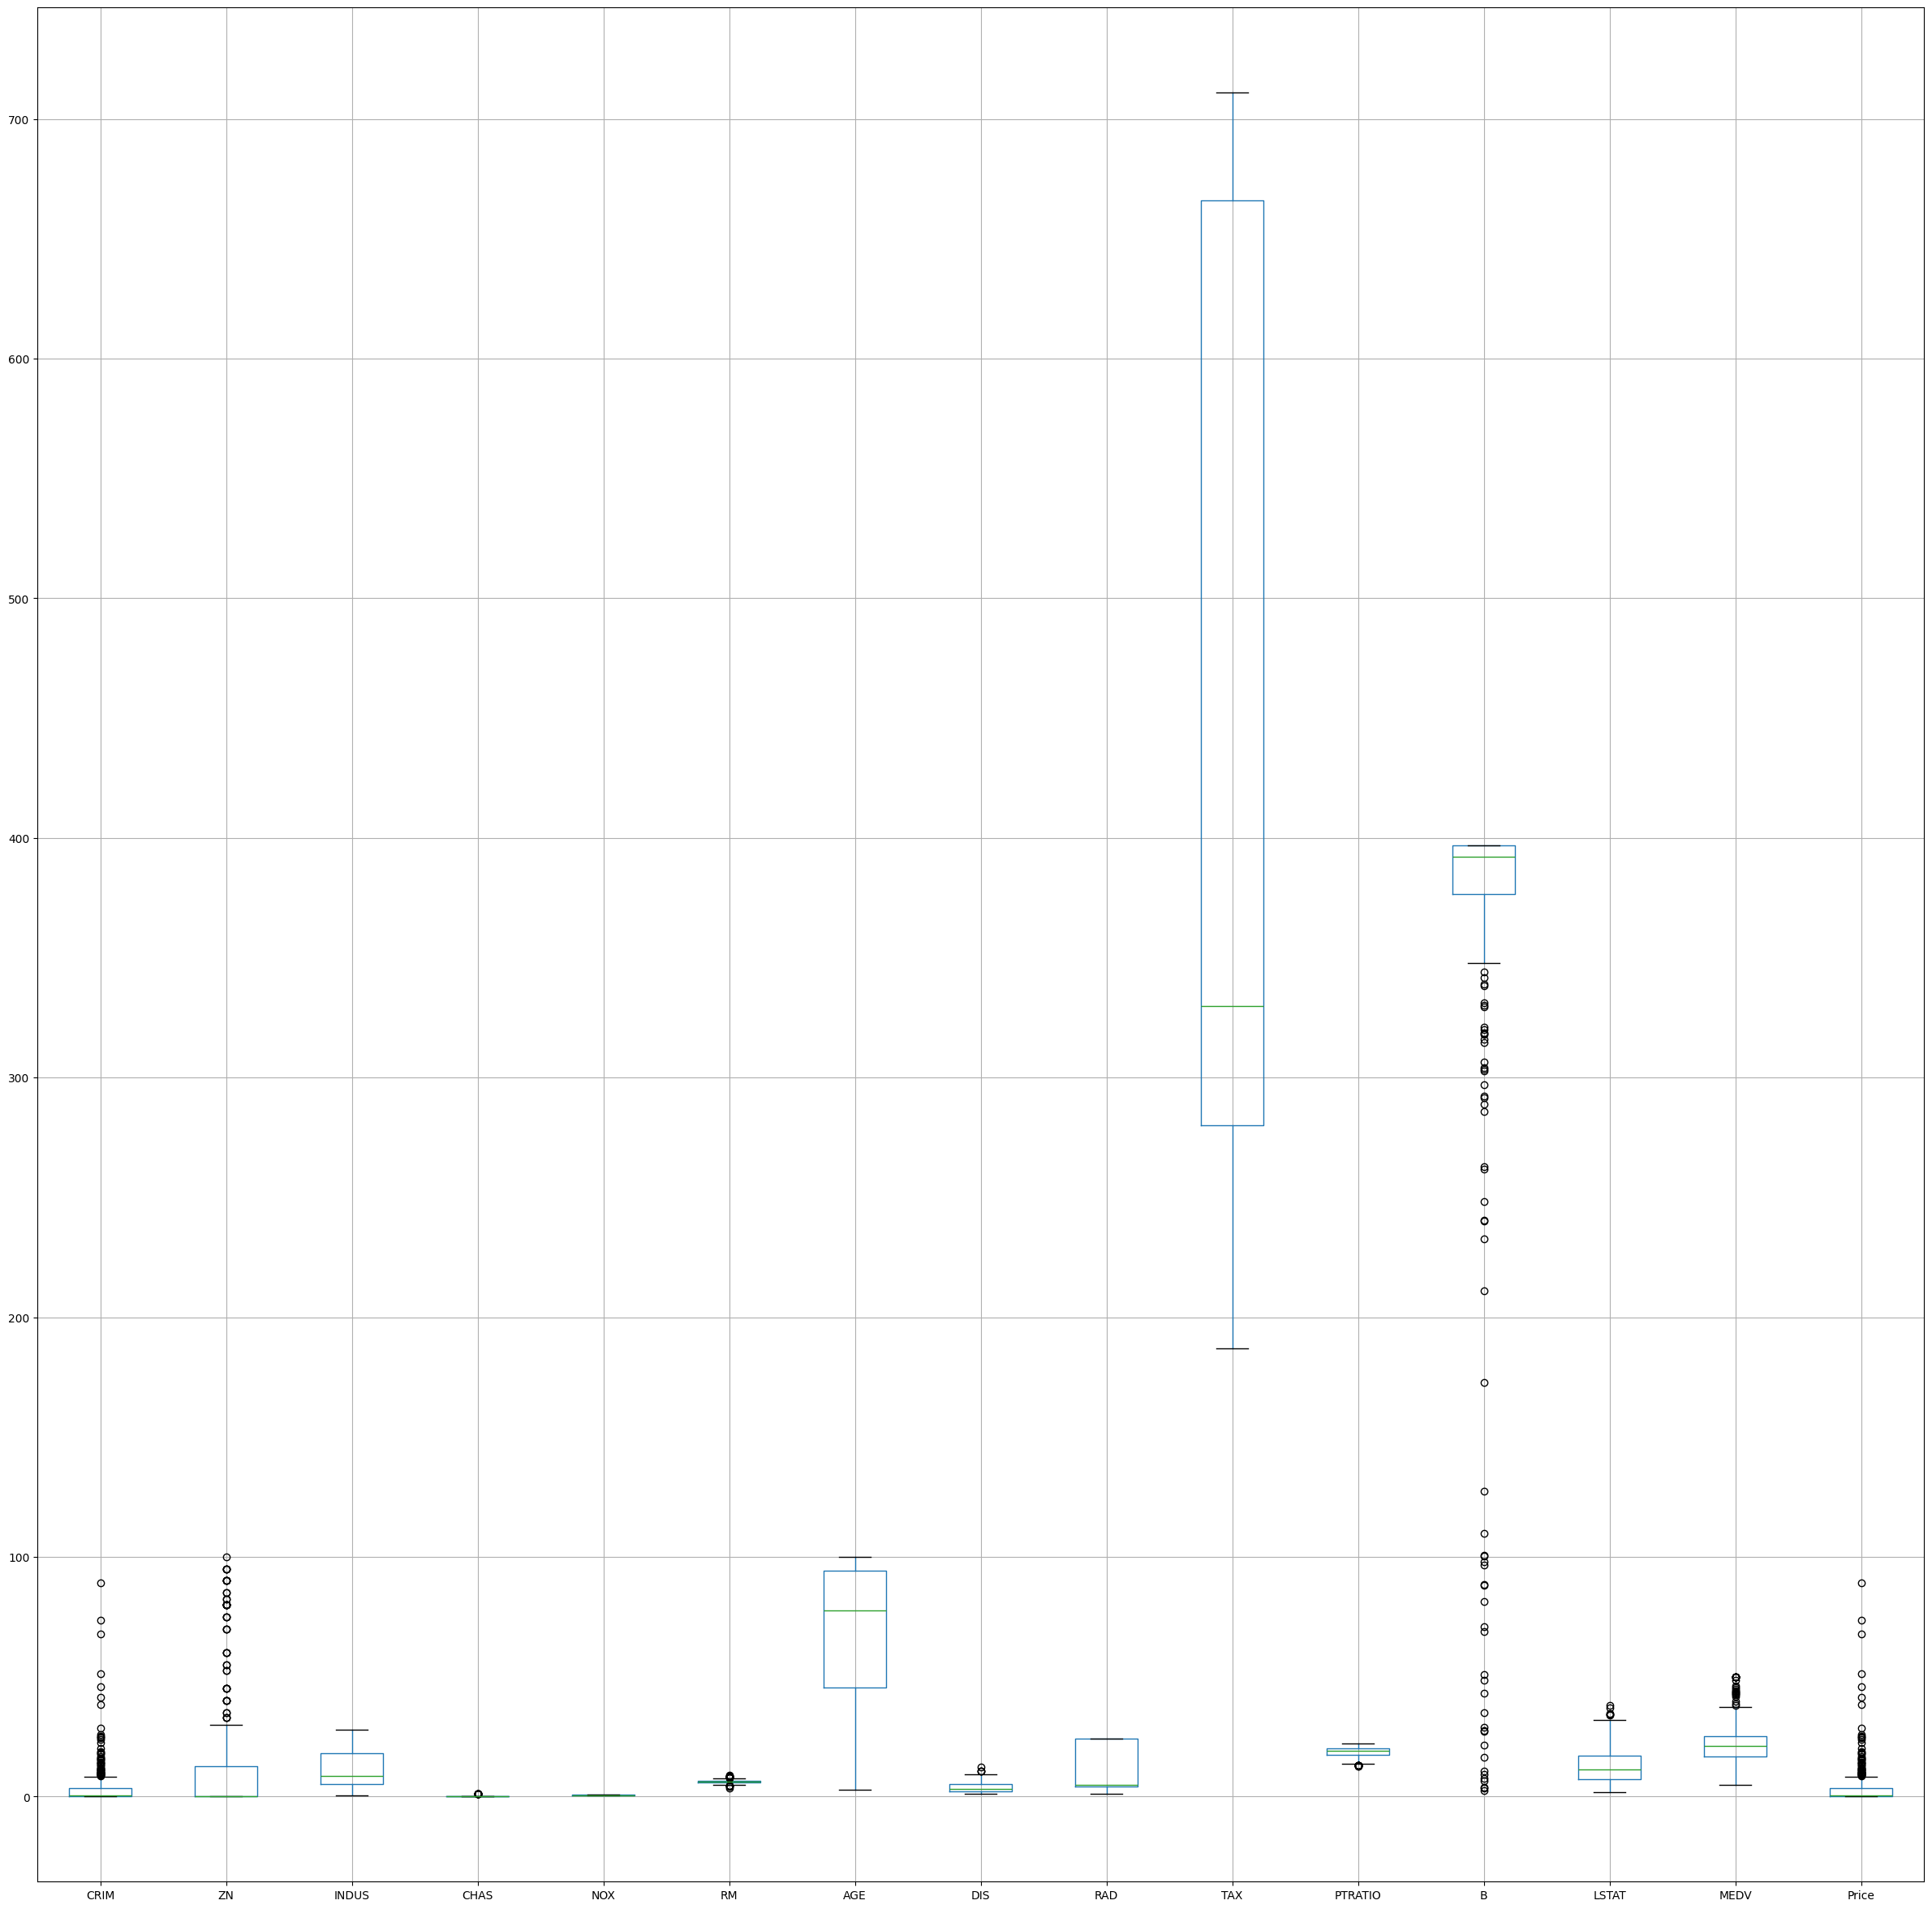

In [43]:
plt.figure(figsize=(30,30))
df.boxplot()

<Axes: >

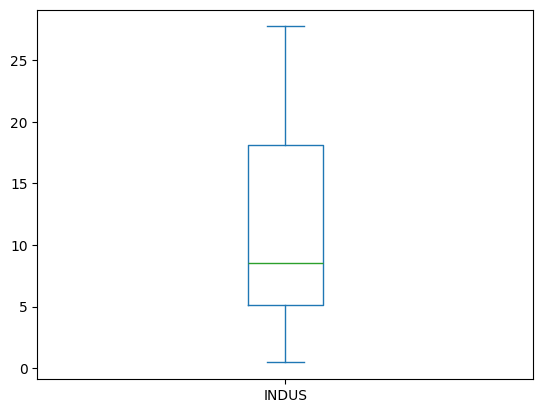

In [44]:
df['INDUS'].plot.box()

In [45]:
df.Price.min()

0.00632

In [46]:
df.Price.max()

88.9762

converting to 2 dimensional array


In [47]:
x=np.array(df.drop('Price', axis = 1))
y=np.array(df['Price'])

In [48]:
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [4.5270e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 9.0800e+00,
        2.0600e+01],
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01]])

In [49]:
#X.to_numpy()

In [50]:
#np.array(X)

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
len(x_train)

315

In [53]:
len(df)

394

In [54]:
model=LinearRegression()

In [55]:
model.fit(x_train,y_train)


LinearRegression()

In [56]:
model.intercept_

2.042810365310288e-14

In [57]:
model.coef_

array([ 1.00000000e+00, -6.96727489e-18, -9.10167891e-17, -3.72613756e-17,
        4.12162693e-17, -2.76426433e-17,  7.39398604e-17, -6.77989586e-17,
        2.20116900e-16, -4.55415452e-17, -5.43959631e-17, -3.44196343e-17,
       -2.59745876e-17,  4.12831089e-17])

In [58]:
y_pred=model.predict(x_test)
y_pred

array([2.87500e-02, 7.24400e-02, 4.75470e-01, 3.58400e-02, 1.77830e-01,
       5.40110e-01, 8.87300e-02, 4.41700e-02, 7.87500e-02, 2.90900e-01,
       9.37800e-02, 5.78340e-01, 2.49800e-02, 4.35710e-01, 2.37857e+00,
       7.95000e-02, 2.14918e+00, 6.16200e-02, 9.23230e+00, 7.36711e+00,
       7.25800e-01, 2.24380e-01, 9.92485e+00, 6.32000e-03, 8.44700e-02,
       3.22640e-01, 3.93200e-02, 2.76300e-02, 7.16500e-02, 4.68400e-02,
       1.38100e-02, 1.02330e+01, 8.26725e+00, 6.80117e+00, 1.71200e-01,
       5.02300e-02, 1.20742e+00, 5.78900e-02, 5.18800e-02, 1.00245e+00,
       5.73500e-02, 6.58800e-02, 5.82401e+00, 6.66400e-02, 3.76800e-02,
       2.63630e-01, 2.05500e-02, 2.86558e+01, 3.40060e-01, 2.14090e-01,
       1.88360e-01, 4.37900e-02, 1.61282e+00, 5.69175e+00, 1.78990e-01,
       2.24236e+00, 2.00900e-02, 2.17190e-01, 6.71910e-01, 8.01400e-02,
       1.07930e-01, 1.64390e-01, 9.51363e+00, 6.14700e-01, 4.57461e+01,
       4.62960e-01, 6.28807e+00, 3.58090e-01, 1.67600e-01, 1.445

In [59]:
x_test

array([[2.87500e-02, 2.80000e+01, 1.50400e+01, ..., 3.96330e+02,
        6.21000e+00, 2.50000e+01],
       [7.24400e-02, 6.00000e+01, 1.69000e+00, ..., 3.92330e+02,
        7.79000e+00, 1.86000e+01],
       [4.75470e-01, 0.00000e+00, 9.90000e+00, ..., 3.96230e+02,
        1.27300e+01, 2.10000e+01],
       ...,
       [3.52330e-01, 0.00000e+00, 2.18900e+01, ..., 3.94080e+02,
        1.45900e+01, 1.71000e+01],
       [3.23700e-02, 0.00000e+00, 2.18000e+00, ..., 3.94630e+02,
        2.94000e+00, 3.34000e+01],
       [1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 3.96900e+02,
        1.87200e+01, 1.52000e+01]])

In [60]:
model.score(x_test,y_test)

1.0

In [61]:
r2=r2_score(y_test,y_pred)

In [62]:
#adjusted r2 square

In [63]:
mse=mean_squared_error(y_test,y_pred)

In [64]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

6.491535907483775e-15

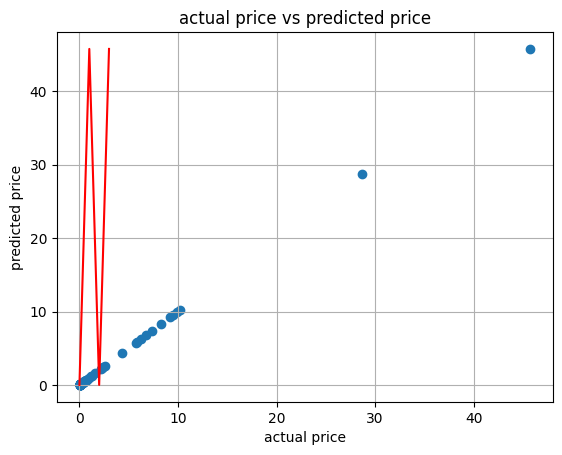

In [65]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.grid()
plt.plot((min(y_test),max(y_test),min(y_pred),max(y_pred)),color='red')
plt.title('actual price vs predicted price')
plt.show()

In [66]:
model.predict([[0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8]])

ValueError: X has 11 features, but LinearRegression is expecting 14 features as input.

In [ ]:
print(f'Linear Regression MSE: {mse}')
print(f'Linear Regression R-squared: {r2}')
print(f'Intercept: {model.intercept_}, Coefficient: {model.coef_}')

In [ ]:
pip install klib